- 입력: `src/data/dataset.csv`(대전 그리드 시뮬레이션 데이터 )

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')
DATA_PATH = Path(r'C:\Users\user00\Desktop\MCI_Diffusion\src\data\dataset.csv')
OUT_DIR = os.path.join('outputs', 'analysis')
os.makedirs(OUT_DIR, exist_ok=True)


In [3]:
df = pd.read_csv(DATA_PATH)
# assert {'lat','lon','pdr_mean'}.issubset(df.columns), "데이터 불충족"
display(df.head())
display(df[['lat','lon','pdr_mean']].describe())


,lat,lon,pdr_mean,pdr_std,source_folder,stat_file
0,36.189861,127.333175,0.043616,0.019540,lat36.189861_lon127.333175,results_lat36.189861_lon127.333175_stat.txt
1,36.194368,127.333165,0.035045,0.013526,lat36.194368_lon127.333165,results_lat36.194368_lon127.333165_stat.txt
2,36.194376,127.338727,0.035412,0.014983,lat36.194376_lon127.338727,results_lat36.194376_lon127.338727_stat.txt
3,36.198884,127.338718,0.034351,0.013220,lat36.198884_lon127.338718,results_lat36.198884_lon127.338718_stat.txt
4,36.198982,127.449951,0.050218,0.020200,lat36.198982_lon127.449951,results_lat36.198982_lon127.449951_stat.txt


,lat,lon,pdr_mean
count,1717.000000,1717.000000,1717.000000
mean,36.344354,127.389688,0.023664
std,0.066168,0.063844,0.010119
min,36.189861,127.249444,0.004756
25%,36.293547,127.338449,0.016263
50%,36.343238,127.388670,0.022976
75%,36.392825,127.444242,0.030349
max,36.496449,127.539046,0.075510


In [4]:
#분위수
q1 = df['pdr_mean'].quantile(0.25)
q3 = df['pdr_mean'].quantile(0.75)
print(f"pdr 1st quartile (Q1): {q1:.6f}")
print(f"pdr 3rd quartile (Q3): {q3:.6f}")


pdr 1st quartile (Q1): 0.016263
pdr 3rd quartile (Q3): 0.030349


In [5]:
# 10개 구간으로 쪼개기
q = np.linspace(0, 1, 11)
df['pdr_q'] = pd.qcut(df['pdr_mean'], q=q, duplicates='drop')
vc = df['pdr_q'].value_counts().sort_index()
display(vc.to_frame('count'))
vc.to_csv(os.path.join(OUT_DIR, 'pdr_counts.csv'))


,count
pdr_q,
"(0.0037600000000000003, 0.0109]",172
"(0.0109, 0.0145]",172
"(0.0145, 0.0178]",171
"(0.0178, 0.0202]",172
"(0.0202, 0.023]",172
"(0.023, 0.0255]",171
"(0.0255, 0.0284]",172
"(0.0284, 0.032]",171
"(0.032, 0.0366]",172


In [6]:
# 통계
grp = df.groupby('pdr_q')
summary = grp.agg(
    n=('pdr_mean','size'),
    pdr_mean_mean=('pdr_mean','mean'),
    pdr_mean_std=('pdr_mean','std'),
    pdr_mean_min=('pdr_mean','min'),
    pdr_mean_max=('pdr_mean','max'),
    lat_mean=('lat','mean'), lon_mean=('lon','mean'),
    lat_std=('lat','std'), lon_std=('lon','std'),
    lat_min=('lat','min'), lon_min=('lon','min'),
    lat_max=('lat','max'), lon_max=('lon','max')
).reset_index()
display(summary)
summary.to_csv(os.path.join(OUT_DIR, 'pdr_summary.csv'), index=False)


C:\Users\user00\AppData\Local\Temp\ipykernel_34204\1533868437.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby('pdr_q')


,pdr_q,n,pdr_mean_mean,pdr_mean_std,pdr_mean_min,pdr_mean_max,lat_mean,lon_mean,lat_std,lon_std,lat_min,lon_min,lat_max,lon_max
0,"(0.0037600000000000003, 0.0109]",172,0.008690,0.001667,0.004756,0.010890,36.338989,127.416594,0.024182,0.029719,36.289101,127.344002,36.388292,127.466579
1,"(0.0109, 0.0145]",172,0.012629,0.001135,0.010912,0.014505,36.333005,127.408732,0.039202,0.038518,36.275562,127.343984,36.406327,127.477726
2,"(0.0145, 0.0178]",171,0.016204,0.001006,0.014513,0.017818,36.330398,127.426737,0.050628,0.047383,36.262068,127.310572,36.451409,127.522298
3,"(0.0178, 0.0202]",172,0.019041,0.000664,0.017857,0.020208,36.356453,127.407316,0.061685,0.054906,36.253084,127.299417,36.455914,127.522299
4,"(0.0202, 0.023]",172,0.021496,0.000811,0.020220,0.022976,36.350029,127.403757,0.064755,0.055877,36.239559,127.293869,36.455911,127.522301
5,"(0.023, 0.0255]",171,0.024261,0.000763,0.022979,0.025490,36.332313,127.389693,0.066965,0.061496,36.221423,127.288261,36.469451,127.516732
6,"(0.0255, 0.0284]",172,0.026932,0.000855,0.025492,0.028390,36.350294,127.381439,0.078569,0.061488,36.212500,127.288225,36.473961,127.522306
7,"(0.0284, 0.032]",171,0.030246,0.001037,0.028393,0.032009,36.367956,127.365700,0.076278,0.059671,36.203392,127.271505,36.482931,127.533461
8,"(0.032, 0.0366]",172,0.034212,0.001293,0.032048,0.036563,36.356364,127.352255,0.082514,0.069950,36.194368,127.255040,36.496449,127.539042
9,"(0.0366, 0.0755]",172,0.042927,0.006921,0.036589,0.075510,36.327726,127.344738,0.079690,0.084452,36.189861,127.249444,36.496444,127.539046


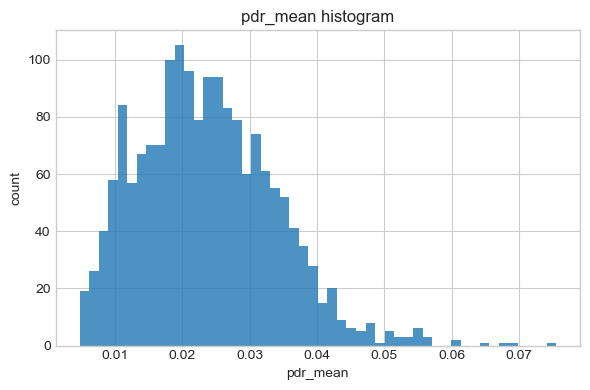

In [7]:
# 히스토그램
fig, ax = plt.subplots(1, 1, figsize=(6,4))  
ax.hist(df['pdr_mean'].values, bins=50, color='#1f77b4', alpha=0.8)  
ax.set_title('pdr_mean histogram')
ax.set_xlabel('pdr_mean'); ax.set_ylabel('count')

plt.tight_layout()
plt.show()

Generated samples loaded: 100 rows
Samples pdr_mean (hardcoded): 0.0163
Assigned to quantile: (0.0145, 0.0178]


C:\Users\user00\AppData\Local\Temp\ipykernel_34204\2211010590.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_ranges = df.groupby('pdr_q')['pdr_mean'].agg(['min', 'max']).sort_index()
C:\Users\user00\AppData\Local\Temp\ipykernel_34204\2211010590.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


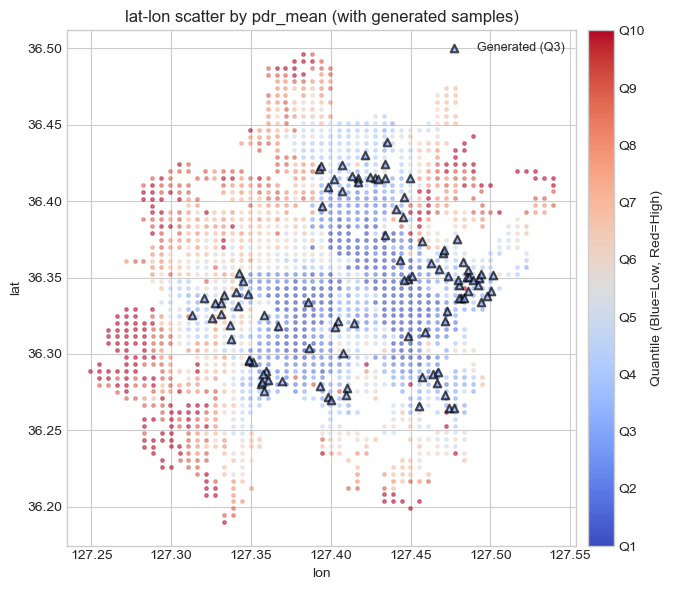

In [8]:
import matplotlib.colors as mcolors
import os

SAMPLE_COND_VALUE = 0.016263

sample_csv_path = os.path.join('..', 'outputs', 'mlp_diffusion', 'samples_q1.csv')
if os.path.exists(sample_csv_path):
    df_generated = pd.read_csv(sample_csv_path)
    print(f"Generated samples loaded: {len(df_generated)} rows")
    
    # 하드코딩한 pdr_mean 값으로 분위수 계산
    if 'pdr_q' in df.columns:
        # 원본 분위수 범위 가져오기
        quantile_ranges = df.groupby('pdr_q')['pdr_mean'].agg(['min', 'max']).sort_index()
        # 하드코딩한 pdr_mean 값이 어느 분위수에 속하는지 찾기
        def get_quantile(pdr_val):
            for qbin, row in quantile_ranges.iterrows():
                if row['min'] <= pdr_val <= row['max']:
                    return qbin
            return None
        
        sample_quantile = get_quantile(SAMPLE_COND_VALUE)
        df_generated['pdr_q'] = sample_quantile
        print(f"Samples pdr_mean (hardcoded): {SAMPLE_COND_VALUE:.4f}")
        print(f"Assigned to quantile: {sample_quantile}")
    else:
        print("원본 데이터에 pdr_q 컬럼이 없습니다.")
        df_generated = None
else:
    print(f"Warning: {sample_csv_path} not found")
    df_generated = None

# 파란색(낮은 분위수) -> 빨간색(높은 분위수) 컬러맵 사용
cmap = plt.cm.get_cmap('coolwarm')  
sample_n = min(5000, len(df))
df_sample = df.sample(sample_n, random_state=42).copy()

fig, ax = plt.subplots(figsize=(7,6))
if 'pdr_q' in df_sample:
    quantile_list = sorted(df_sample['pdr_q'].unique())
    n_quantiles = len(quantile_list)
    
    # 각 분위수에 대해 컬러맵에서 색상 가져오기 (0.0=파란색, 1.0=빨간색)
    for idx, qbin in enumerate(quantile_list):
        sub = df_sample[df_sample['pdr_q'] == qbin]
        # 인덱스를 사용해서 0~1 범위로 정규화 (Interval 타입 처리)
        norm_pos = idx / max(1, n_quantiles - 1)
        color = cmap(norm_pos)
        ax.scatter(sub['lon'], sub['lat'], s=6, alpha=0.5, color=color)
else:
    ax.scatter(df_sample['lon'], df_sample['lat'], s=6, alpha=0.5, color='#1f77b4')

# 생성된 샘플 데이터를 분위수 색상으로 세모 마커로 표시
if df_generated is not None and len(df_generated) > 0 and 'pdr_q' in df_generated.columns:
    sample_quantile = df_generated['pdr_q'].iloc[0]
    quantile_list = sorted(df['pdr_q'].unique()) if 'pdr_q' in df.columns else []
    
    if quantile_list:
        # 샘플 분위수가 quantile_list에서 몇 번째인지 찾기 (Interval 타입 처리)
        try:
            sample_idx = quantile_list.index(sample_quantile)
        except (ValueError, TypeError):
            # Interval 비교가 실패하면 인덱스 0 사용
            sample_idx = 0
        
        # 인덱스를 사용해서 0~1 범위로 정규화
        norm_pos = sample_idx / max(1, len(quantile_list) - 1)
        sample_color = cmap(norm_pos)
        
        # Generated 샘플만 범례에 표시 (간단한 라벨)
        sample_idx_in_list = quantile_list.index(sample_quantile) if sample_quantile in quantile_list else 0
        sample_label = f'Generated (Q{sample_idx_in_list + 1})'
        ax.scatter(df_generated['lon'], df_generated['lat'], 
                  s=30, alpha=0.7, marker='^', 
                  color=sample_color, 
                  edgecolors='black', linewidths=1.5,
                  label=sample_label, zorder=10)
    
    # Generated 샘플만 범례에 표시 (간단하게)
    if df_generated is not None and len(df_generated) > 0 and 'pdr_q' in df_generated.columns:
        ax.legend(loc='upper right', fontsize=9, framealpha=0.9)

# 컬러바 추가 (파란색=낮은 분위수, 빨간색=높은 분위수)
if 'pdr_q' in df_sample and len(quantile_list) > 1:
    # Interval 타입 처리: 인덱스 기반으로 정규화
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(quantile_list)-1))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, label='Quantile (Blue=Low, Red=High)', pad=0.02)
    # 간단한 라벨: Q1, Q2, ... 또는 인덱스만
    if len(quantile_list) <= 10:
        # 분위수가 10개 이하면 모두 표시
        cbar.set_ticks(range(len(quantile_list)))
        cbar.set_ticklabels([f'Q{i+1}' for i in range(len(quantile_list))])
    else:
        # 분위수가 많으면 일부만 표시
        step = max(1, len(quantile_list) // 5)
        ticks = list(range(0, len(quantile_list), step))
        if ticks[-1] != len(quantile_list) - 1:
            ticks.append(len(quantile_list) - 1)
        cbar.set_ticks(ticks)
        cbar.set_ticklabels([f'Q{i+1}' for i in ticks])

ax.set_title('lat-lon scatter by pdr_mean (with generated samples)')
ax.set_xlabel('lon'); ax.set_ylabel('lat')
plt.tight_layout(); plt.show()
